In [1]:
import pertpy as pt
import scanpy as sc
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300
import seaborn as sns
from scipy import stats
from scipy import sparse 
from statsmodels.sandbox.stats.multicomp import multipletests


Installed version 0.4.0 of pertpy is newer than the latest release 0.3.0! You are running a nightly version and 
features may break!

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


In [2]:
%load_ext autoreload
%autoreload 2

#import importlib
#importlib.reload(pt)

In [3]:
adata = sc.read_h5ad("zhang_with_PCs.h5ad")

In [4]:
def test_association(adata, celltype_label = "Cluster", sample_label="Sample", condition_label = "Efficacy", conditions_compare = ("PR","SD")): 
    pvals = pd.DataFrame(1, adata.obs[celltype_label].unique().tolist(), ["mcp_"+str(n) for n in range(0,10)])
    tstats = pd.DataFrame(1, adata.obs[celltype_label].unique().tolist(), ["mcp_"+str(n) for n in range(0,10)])
    response = adata.obs.groupby(sample_label)[condition_label].agg(pd.Series.mode)
    res = dict()
    for celltype in adata.obs[celltype_label].unique().tolist():
        df = adata.obs[adata.obs[celltype_label]==celltype]

        for mcpnum in ["mcp_"+str(n) for n in range(0,10)]:
            mns = df.groupby(sample_label)[mcpnum].mean()
            mns = pd.concat([mns,response],axis=1)
            res = stats.ttest_ind(mns[mns[condition_label]==conditions_compare[0]][mcpnum],mns[mns[condition_label]==conditions_compare[1]][mcpnum])
            pvals.loc[celltype, mcpnum]=res[1]
            tstats.loc[celltype, mcpnum]=res[0]
    return pvals,tstats


In [5]:
# blood samples only
adata = adata[adata.obs['Origin']=="b" ,:].copy()

In [6]:
# pre-treatment samples only 
adata = adata[adata.obs['Sample'].str.contains('Pre'),:].copy()

In [7]:
isecs = pd.crosstab(adata.obs['Cluster'], adata.obs['Sample'])

(array([ 5.,  2.,  2.,  2.,  5.,  1.,  0.,  1.,  6., 16.]),
 array([ 1.,  3.,  5.,  7.,  9., 11., 13., 15., 17., 19., 21.]),
 <BarContainer object of 10 artists>)

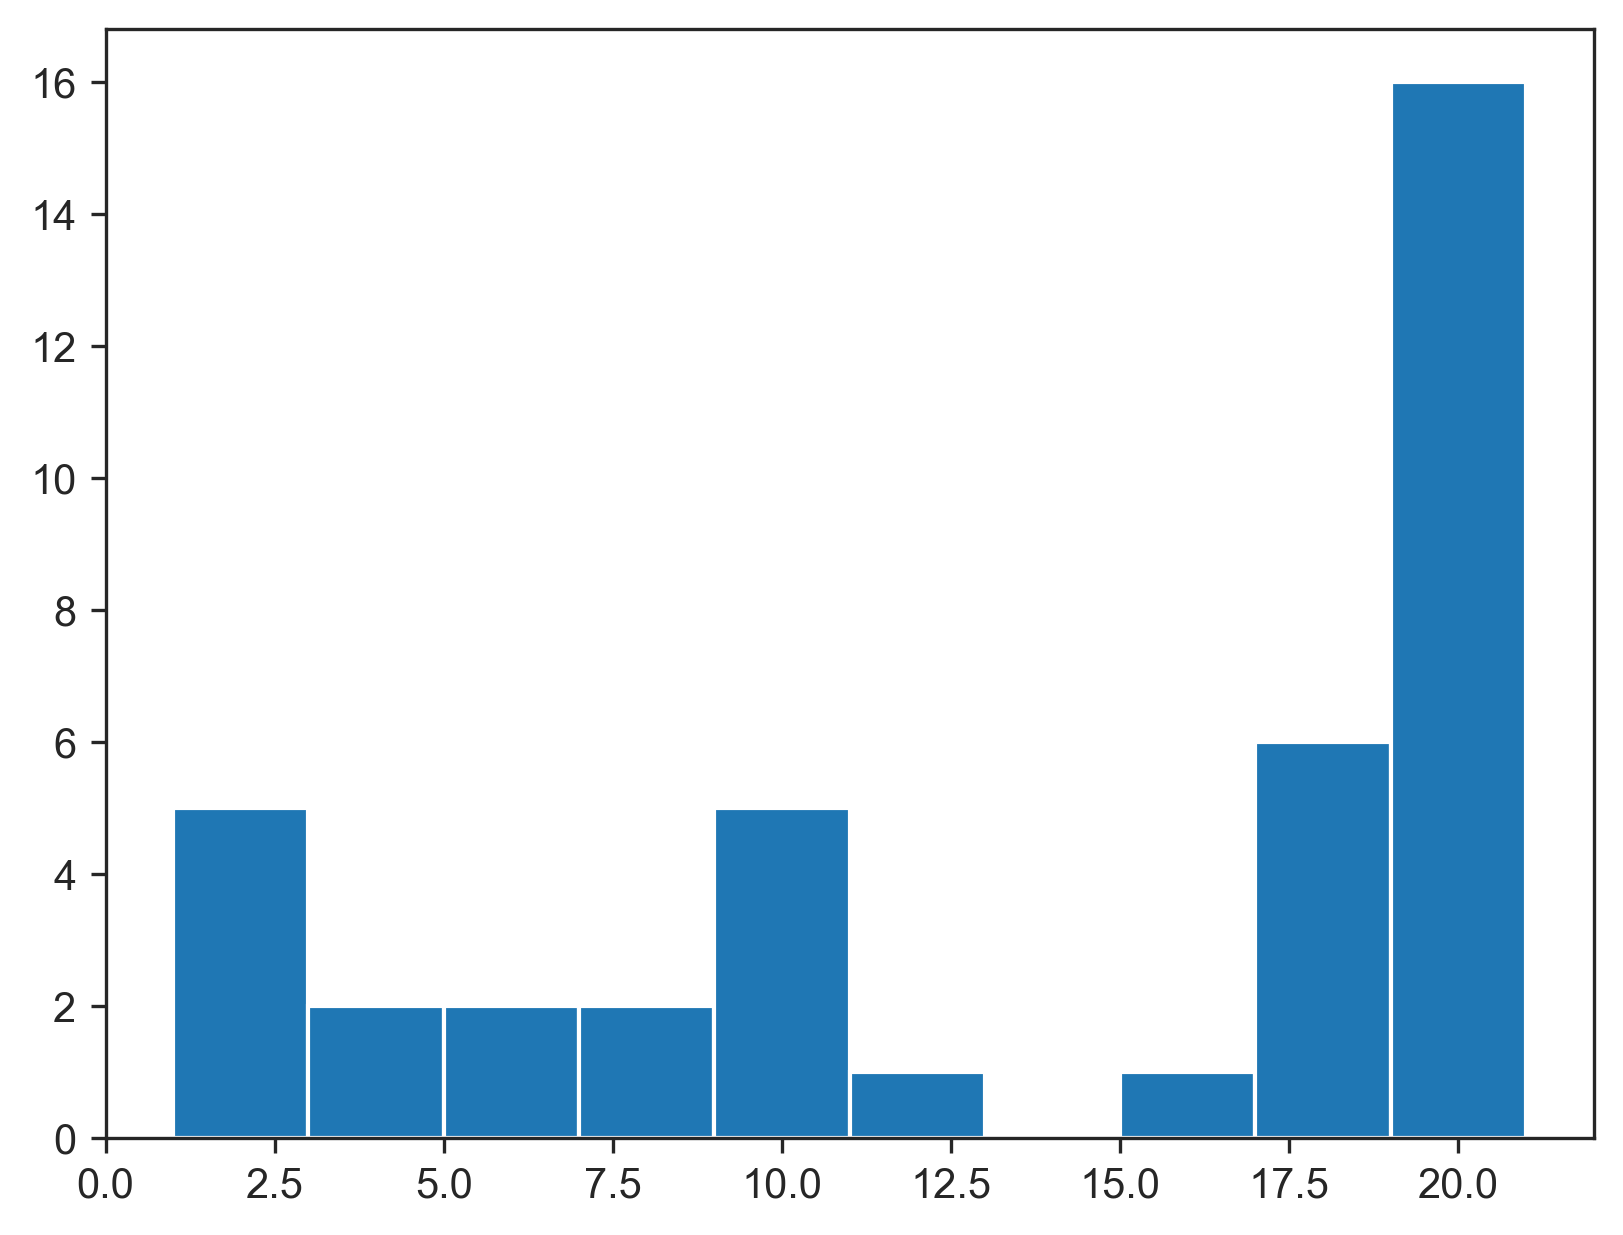

In [9]:
plt.hist((isecs >3).sum(axis=1))

(array([1., 0., 2., 1., 5., 4., 5., 1., 1., 1.]),
 array([14. , 16.3, 18.6, 20.9, 23.2, 25.5, 27.8, 30.1, 32.4, 34.7, 37. ]),
 <BarContainer object of 10 artists>)

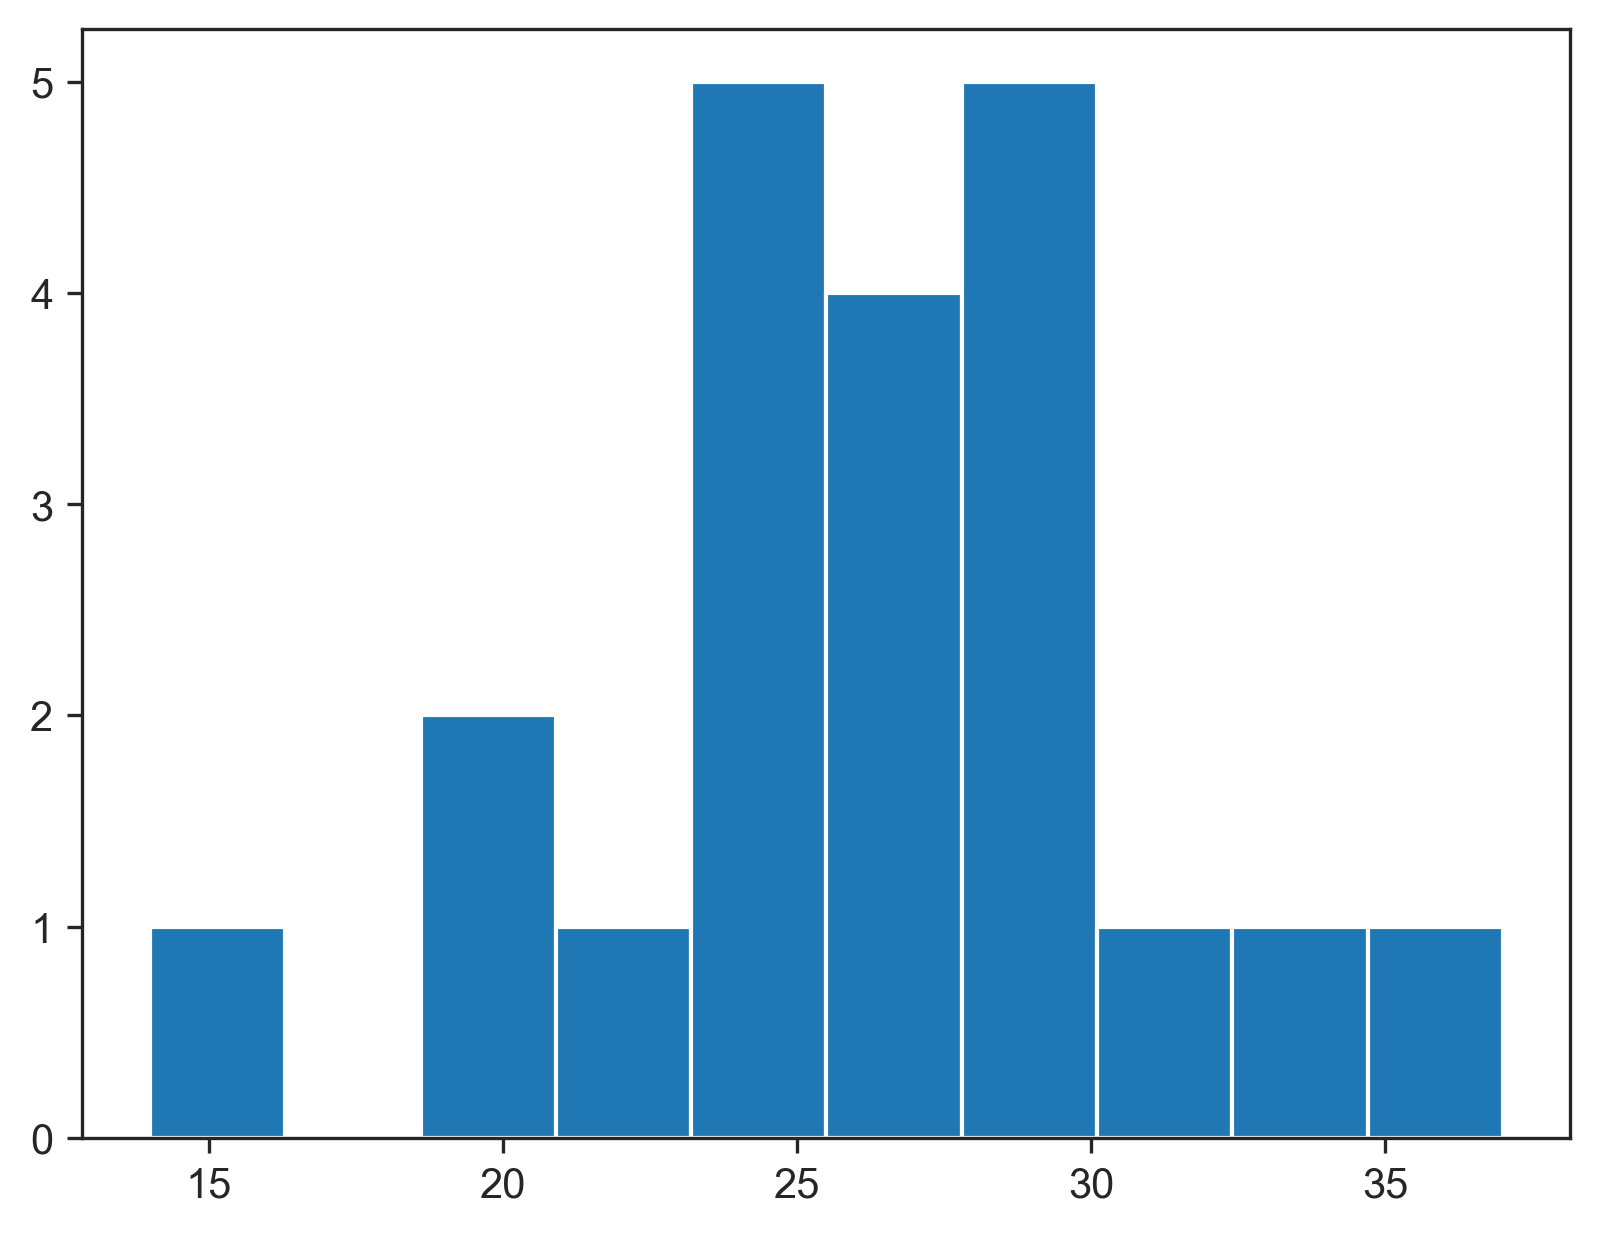

In [33]:
plt.hist((isecs >3).sum(axis=0))

In [34]:
isecs[(isecs > 3).sum(axis=1) == np.shape(isecs)[1]]

Sample           Pre_P001_b  Pre_P002_b  Pre_P004_b  Pre_P005_b  Pre_P007_b  \
Cluster                                                                       
b_Bmem-CD27             298         326         314          94         355   
b_Bn-TCL1A              413         566         686         609        1160   
b_CD4_Tcm-TCF7         1328         882        2026         690        1099   
b_CD4_Tem-GZMK          160         203        1739         100         739   
b_CD8_Teff-GNLY         350        1653         228         623         441   
b_CD8_Tem-GZMK           88         588         520         677         174   
b_ILC1-HSPA8             28          89         403          81         268   
b_Tgd-KLRB1             204          75         748         357         152   

Sample           Pre_P008_b  Pre_P010_b  Pre_P011_b  Pre_P012_b  Pre_P013_b  \
Cluster                                                                       
b_Bmem-CD27             133         118         147          81         309   
b_Bn-TCL1A             1349         681          43          11         444   
b_CD4_Tcm-TCF7         1190         462         290          11        1003   
b_CD4_Tem-GZMK          476         563         215          17         522   
b_CD8_Teff-GNLY         734        1713         108          14         409   
b_CD8_Tem-GZMK         1049         705         273          17         737   
b_ILC1-HSPA8             71         214          78          11         216   
b_Tgd-KLRB1              55         208          21           5         198   

Sample           ...  Pre_P016_b  Pre_P017_b  Pre_P018_b  Pre_P019_b  \
Cluster          ...                                                   
b_Bmem-CD27      ...         188          84          31          71   
b_Bn-TCL1A       ...         705         764         210         257   
b_CD4_Tcm-TCF7   ...        2126         559          51         625   
b_CD4_Tem-GZMK   ...         490         181          32         342   
b_CD8_Teff-GNLY  ...         448         193          48         245   
b_CD8_Tem-GZMK   ...         136         334          55         133   
b_ILC1-HSPA8     ...         107          59          13         177   
b_Tgd-KLRB1      ...         526         599          29          21   

Sample           Pre_P020_b  Pre_P022_b  Pre_P023_b  Pre_P024_b  Pre_P025_b  \
Cluster                                                                       
b_Bmem-CD27             312         112         954         266         392   
b_Bn-TCL1A              496         353          71         523         112   
b_CD4_Tcm-TCF7         2339        1759         240        2499        1190   
b_CD4_Tem-GZMK          499         314         138         268         105   
b_CD8_Teff-GNLY         182         429         458         159         568   
b_CD8_Tem-GZMK          176         486         401         591         290   
b_ILC1-HSPA8             20          14          98          22         113   
b_Tgd-KLRB1             162          89         150         417         251   

Sample           Pre_P028_b  
Cluster                      
b_Bmem-CD27             148  
b_Bn-TCL1A              495  
b_CD4_Tcm-TCF7         1357  
b_CD4_Tem-GZMK          527  
b_CD8_Teff-GNLY         321  
b_CD8_Tem-GZMK          163  
b_ILC1-HSPA8             33  
b_Tgd-KLRB1             312  

[8 rows x 21 columns]

In [37]:
isecs[(isecs > 3).sum(axis=1) == np.shape(isecs)[1]-1].min() # drop 2 patients to add these cell types in


Sample
Pre_P001_b     10
Pre_P002_b     29
Pre_P004_b     23
Pre_P005_b     64
Pre_P007_b     25
Pre_P008_b     21
Pre_P010_b     35
Pre_P011_b     11
Pre_P012_b      0
Pre_P013_b    142
Pre_P014_b     16
Pre_P016_b     56
Pre_P017_b     13
Pre_P018_b      0
Pre_P019_b     39
Pre_P020_b      8
Pre_P022_b     12
Pre_P023_b     45
Pre_P024_b     34
Pre_P025_b     21
Pre_P028_b     13
dtype: int64

In [38]:
celltypes = isecs[(isecs > 3).sum(axis=1) >= np.shape(isecs)[1]-1].index.values.to_list()

In [42]:
adata = adata[adata.obs['Cluster'].isin(celltypes),:].copy()

In [43]:
adata

AnnData object with n_obs × n_vars = 91649 × 4000
    obs: 'Sample', 'Patient', 'Origin', 'Tissue', 'Efficacy', 'Group', 'Treatment', 'Number of counts', 'Number of genes', 'Major celltype', 'Cluster'
    var: 'n_cells', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'mean', 'std'
    uns: 'hvg', 'log1p', 'pca'
    obsm: 'X_pca'
    varm: 'PCs'

In [44]:
isecs = pd.crosstab(adata.obs['Cluster'], adata.obs['Sample'])

In [46]:
keep_pts = isecs.loc[:,(isecs > 3).sum(axis=0) == isecs.shape[0]].columns.values.to_list()

In [47]:
keep_pts

['Pre_P001_b',
 'Pre_P002_b',
 'Pre_P004_b',
 'Pre_P005_b',
 'Pre_P007_b',
 'Pre_P008_b',
 'Pre_P010_b',
 'Pre_P011_b',
 'Pre_P013_b',
 'Pre_P014_b',
 'Pre_P016_b',
 'Pre_P017_b',
 'Pre_P019_b',
 'Pre_P020_b',
 'Pre_P022_b',
 'Pre_P023_b',
 'Pre_P024_b',
 'Pre_P025_b',
 'Pre_P028_b']

In [48]:
adata = adata[adata.obs['Sample'].isin(keep_pts),:].copy()

In [49]:
pd.crosstab(adata.obs['Cluster'], adata.obs['Sample']).min(axis=1)

Cluster
b_Bmem-CD27         71
b_Bn-TCL1A          43
b_CD4_Tcm-TCF7     240
b_CD4_Tem-GZMK     100
b_CD8_Teff-GNLY    108
b_CD8_Tem-GZMK      88
b_CD8_Tn-CCR7       40
b_CD16-CDKN1C       13
b_ILC1-CD160        31
b_ILC1-HSPA8        14
b_ILC1-KLRC3        14
b_ILC1-XCL1          8
b_Tgd-KLRB1         21
b_Tprf-MKI67        16
dtype: int64

In [50]:
pd.crosstab(adata.obs['Cluster'], adata.obs['Sample']).min(axis=0)

Sample
Pre_P001_b     10
Pre_P002_b     29
Pre_P004_b     23
Pre_P005_b     64
Pre_P007_b     25
Pre_P008_b     21
Pre_P010_b     35
Pre_P011_b     11
Pre_P013_b    142
Pre_P014_b     16
Pre_P016_b     56
Pre_P017_b     13
Pre_P019_b     21
Pre_P020_b      8
Pre_P022_b     12
Pre_P023_b     45
Pre_P024_b     22
Pre_P025_b     21
Pre_P028_b     13
dtype: int64

In [51]:
sc.pp.neighbors(adata)
sc.tl.umap(adata)

In [57]:
adata_plot = sc.pp.subsample(adata,  n_obs=10000, random_state=0, copy=True)



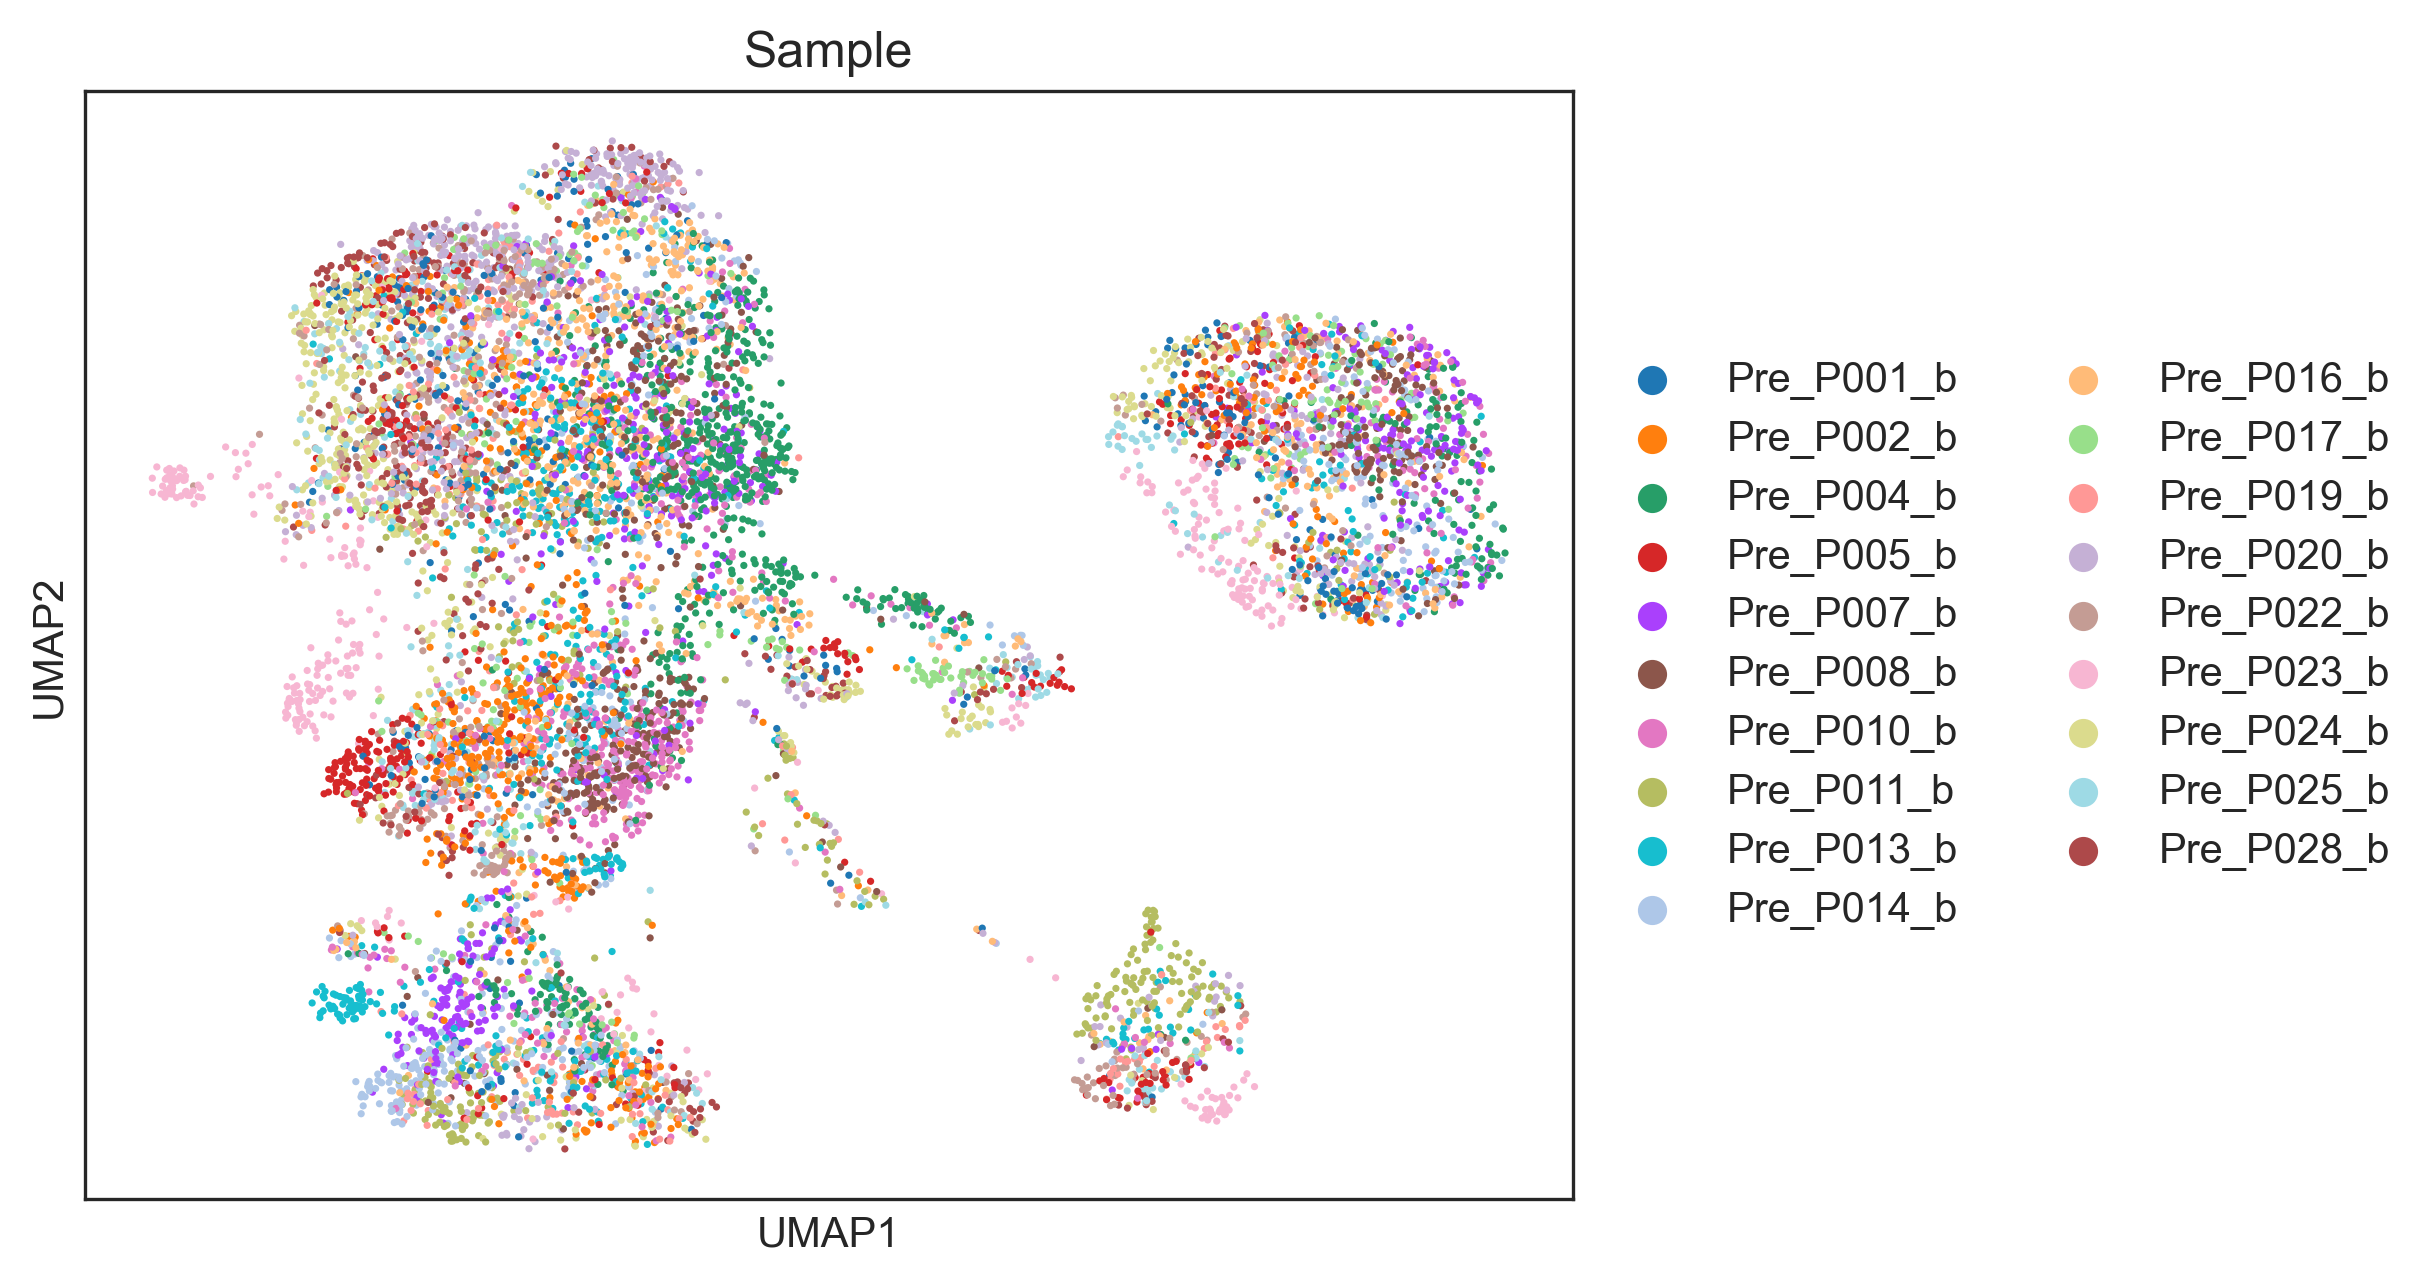

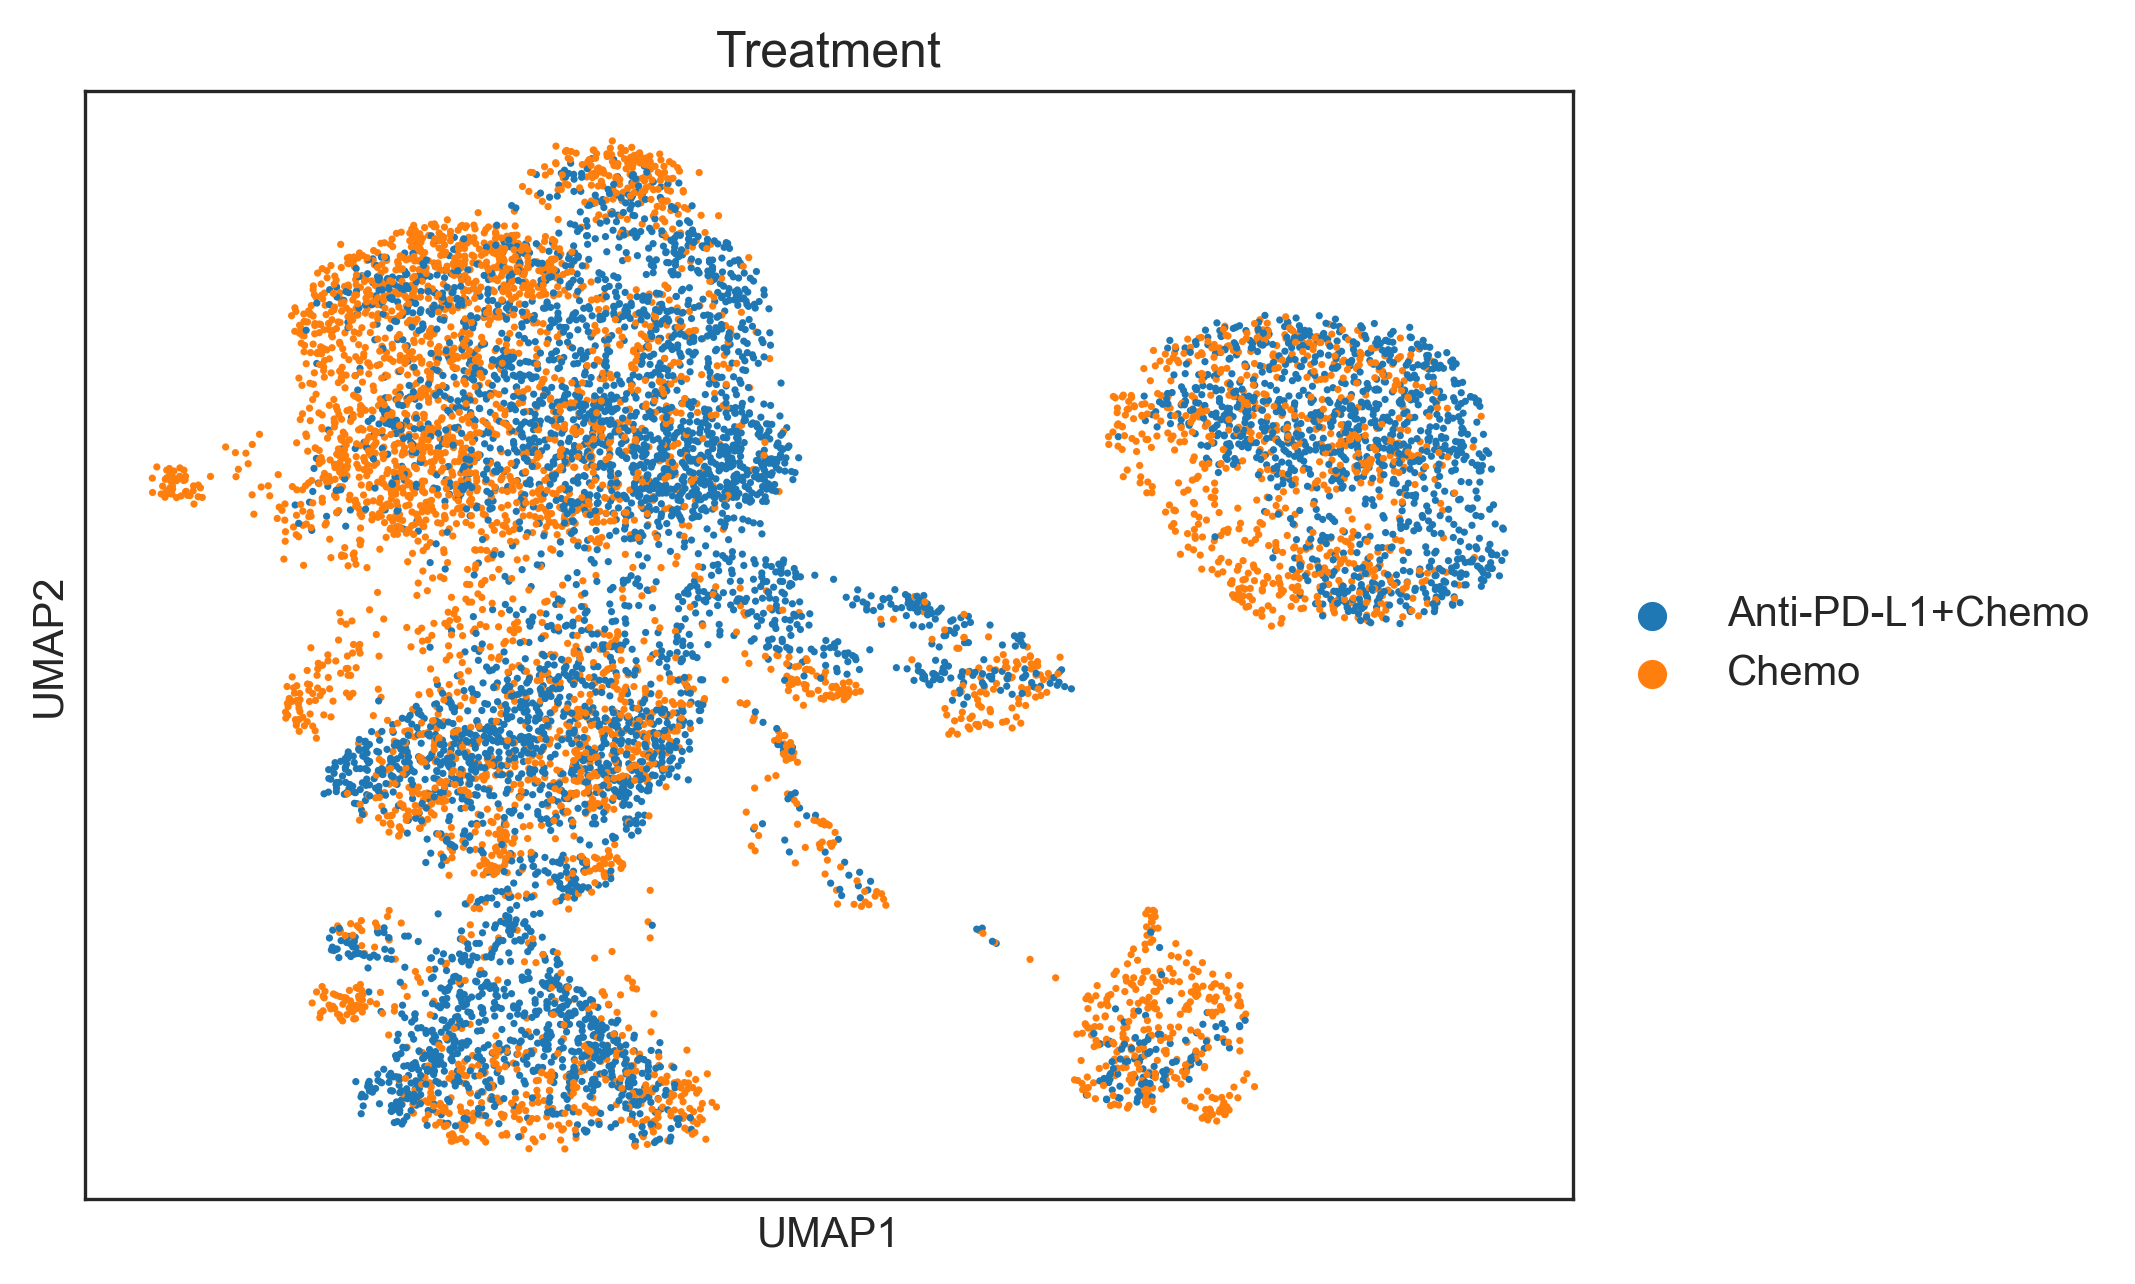

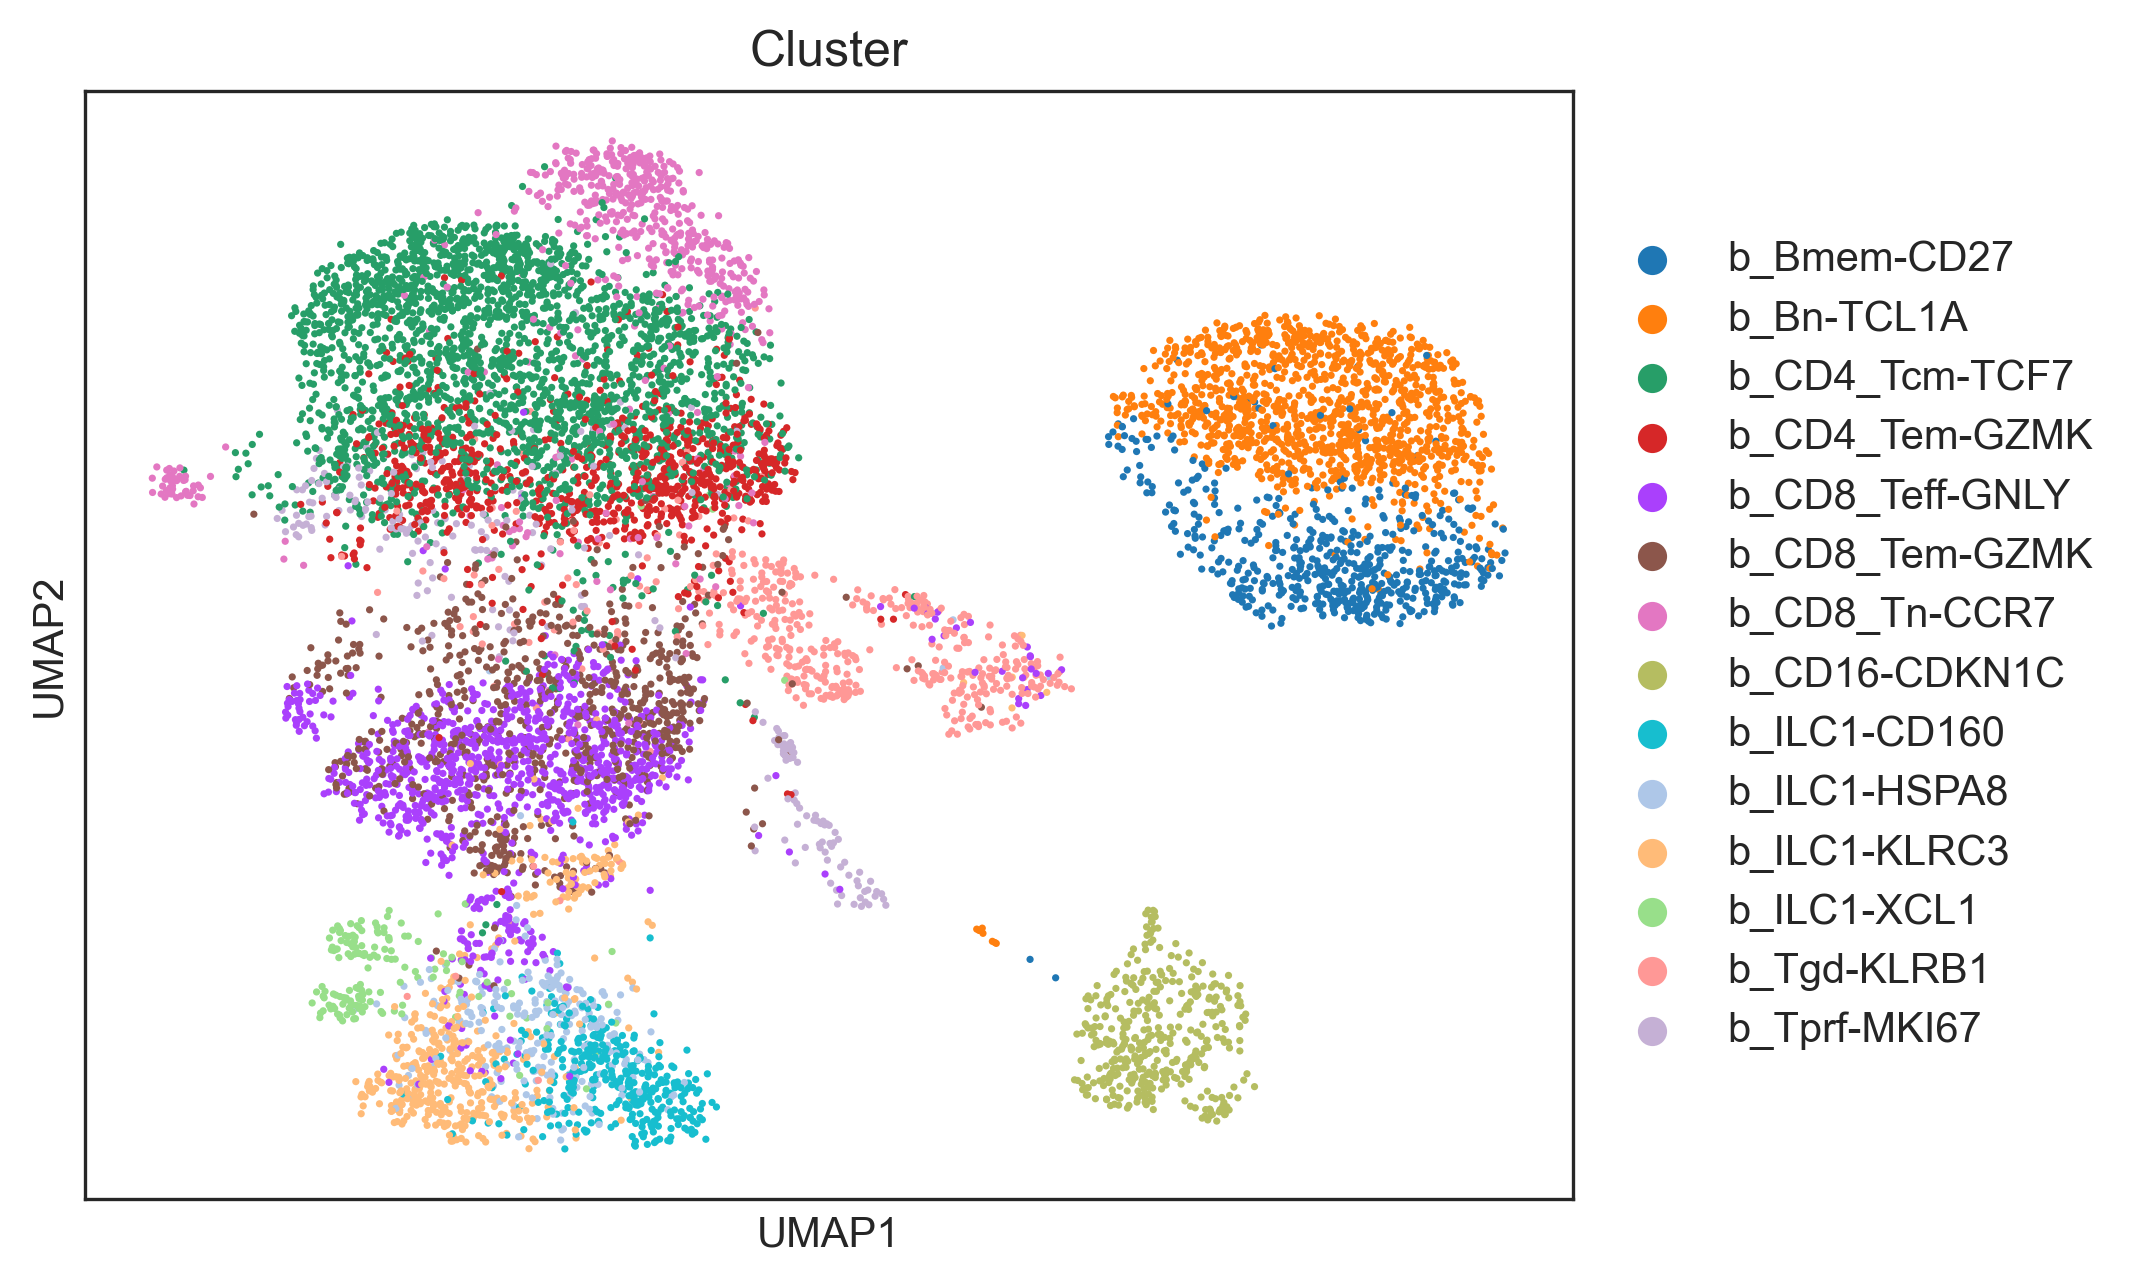

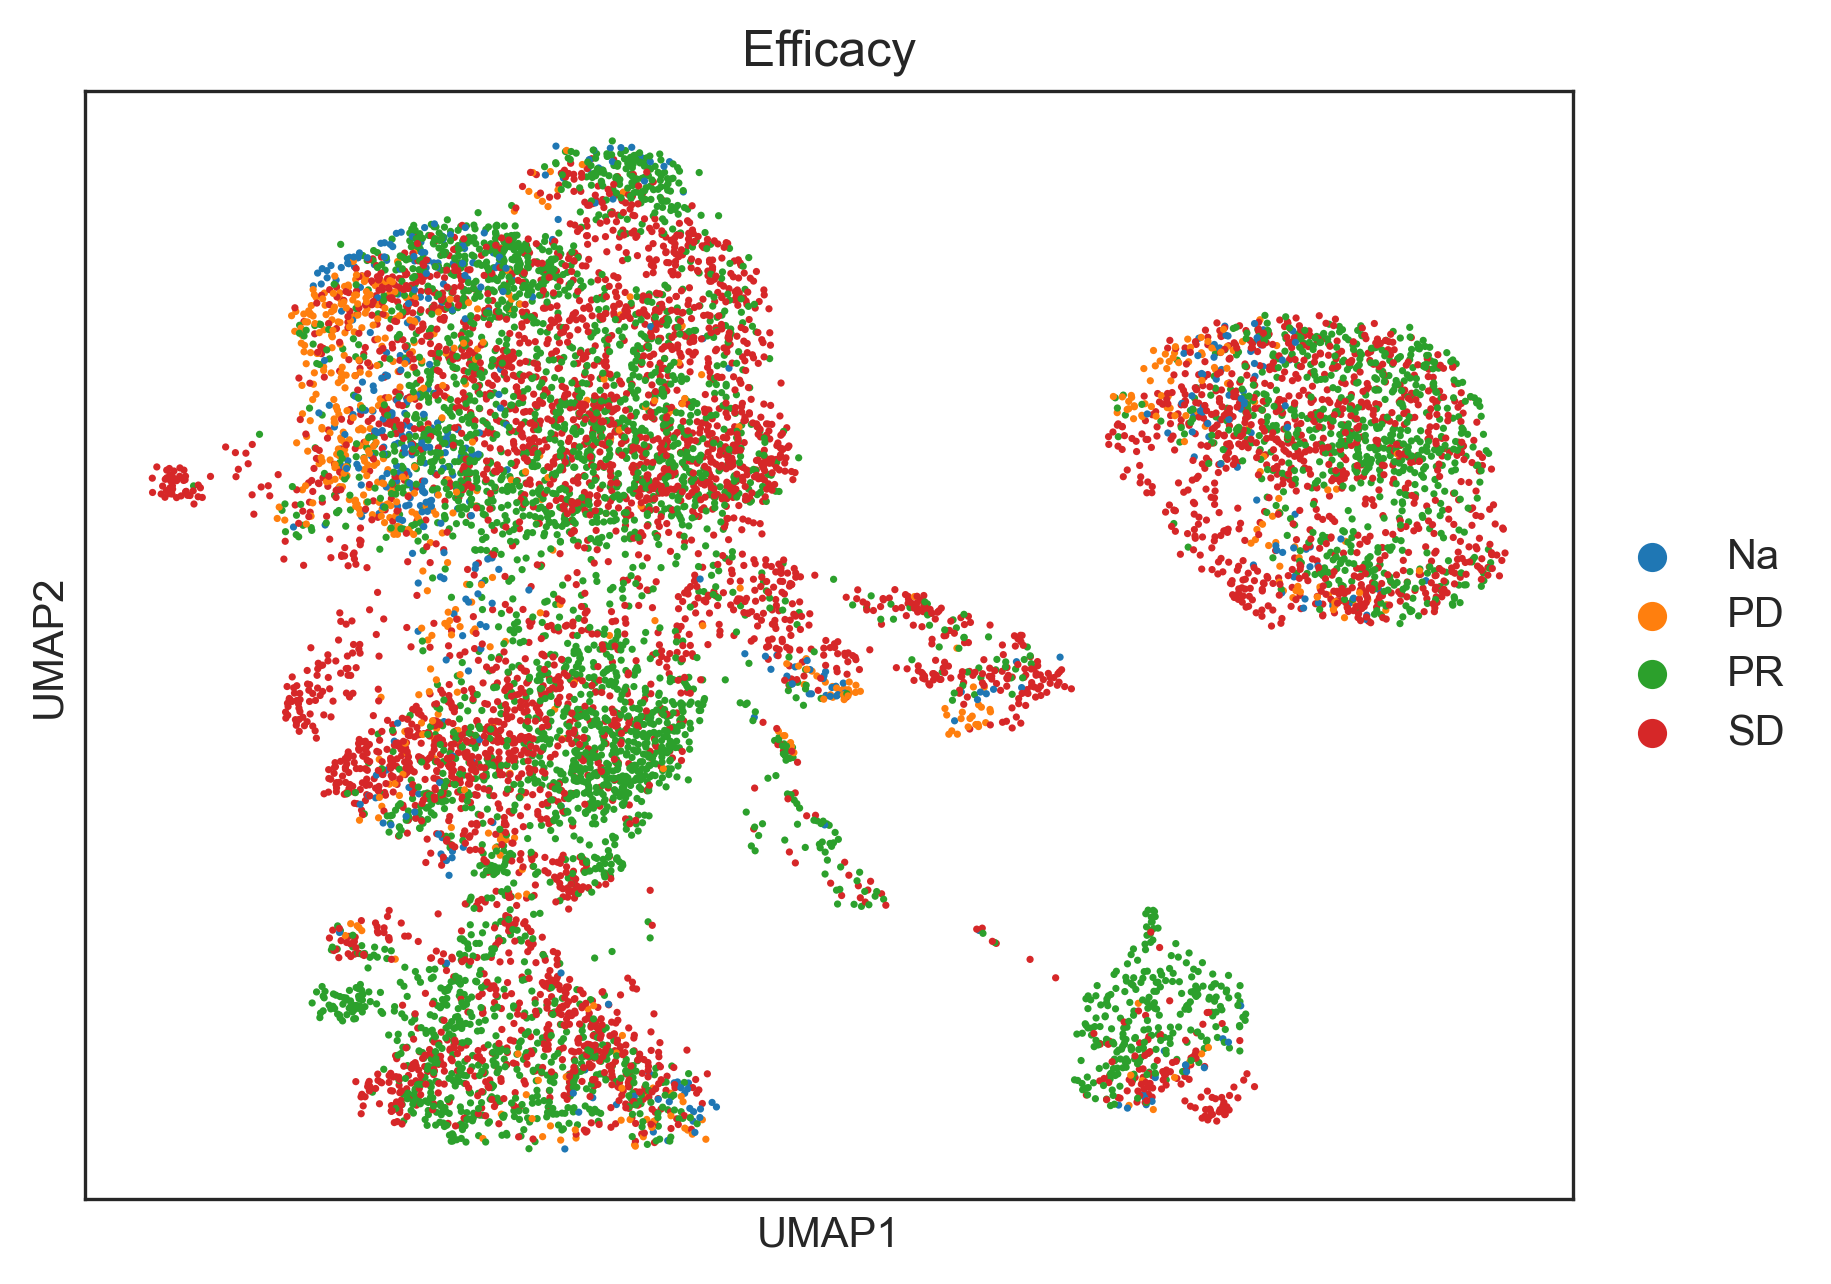

In [60]:
sc.pl.umap(
    adata_plot,
    color=[
        "Sample"
    ],
)
sc.pl.umap(
    adata_plot,
    color=[
        "Treatment"
    ],
)

sc.pl.umap(
    adata_plot,
    color=[
        "Cluster"
    ],
)

sc.pl.umap(
    adata_plot,
    color=[
        "Efficacy"
    ],
)

In [61]:
adata_1 = adata.copy()

dl_1 = pt.tl.Dialogue(sample_id = "Sample",
                   celltype_key = "Cluster",
                   n_counts_key = "Number of counts",
                   n_mpcs = 10)

adata_1, mcps_1, ws_1, ct_subs_1 = dl_1.calculate_multifactor_PMD(
    adata_1,
    normalize=False,
    solver="lp"
)

In [ ]:
# PR,partial response; SD,stable disease; PD, progressive disease 

# so drop anything with 'NA' before testing anything
# and then test PR vs [other two combined]

In [66]:
adata_1.obs['Efficacy'].value_counts()

SD    41837
PR    38601
PD     5380
Na     4163
Name: Efficacy, dtype: int64

In [76]:
adata_1 = adata_1[adata_1.obs['Efficacy']!='Na']
# definitely should record biopsy location somewhere, since some are mets and some aren't

In [83]:
adata_1.obs['Responder']= adata_1.obs['Efficacy']=='PR'

In [85]:
adata_1.obs['Responder'].value_counts()

False    47217
True     38601
Name: Responder, dtype: int64

In [86]:
pvals_1, tstats_1 = test_association(adata_1, condition_label="Responder", conditions_compare=(True,False))



In [89]:
pvals_1.min()

# almost all of the MCPs have at least one cell type correlating with responder status!

mcp_0    0.017340
mcp_1    0.022824
mcp_2    0.039804
mcp_3    0.068293
mcp_4    0.153546
mcp_5    0.095195
mcp_6    0.020841
mcp_7    0.009612
mcp_8    0.006659
mcp_9    0.005569
dtype: float64